<a href="https://colab.research.google.com/github/Praveent1304/Uber-Data-Analysis/blob/main/Uber_Data_Analysis_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Setting up environment...")

Setting up environment...


In [3]:
# Install additional packages if needed
# !pip install -q seaborn pandas numpy matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Colab display settings
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['figure.dpi'] = 100

print("✓ All packages loaded successfully!")
print(f"✓ Pandas version: {pd.__version__}")
print(f"✓ NumPy version: {np.__version__}")
print(f"✓ Matplotlib version: {plt.matplotlib.__version__}")

✓ All packages loaded successfully!
✓ Pandas version: 2.2.2
✓ NumPy version: 2.0.2
✓ Matplotlib version: 3.10.0


In [7]:
#UPLOAD AND LOAD DATA
print("\n" + "="*70)
print("UPLOADING DATA FILE")
print("="*70)
print("\nClick 'Choose Files' below and upload 'cleaned_trip_data.csv'")

from google.colab import files
uploaded = files.upload()

# Load the data
df = pd.read_csv('cleaned_trip_data.csv')

# Convert dates
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

# Calculate trip duration
df['trip_duration_minutes'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60

print(f"\n✓ Data loaded successfully!")
print(f"✓ Total records: {len(df):,}")
print(f"✓ Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"✓ Date range: {df['START_DATE'].min()} to {df['START_DATE'].max()}")



UPLOADING DATA FILE

Click 'Choose Files' below and upload 'cleaned_trip_data.csv'


Saving cleaned_trip_data.csv to cleaned_trip_data.csv

✓ Data loaded successfully!
✓ Total records: 261
✓ Memory usage: 0.09 MB
✓ Date range: 2016-01-01 21:11:00 to 2016-12-12 20:48:00


In [9]:
#DATA OVERVIEW
print("\n" + "="*70)
print("DATA OVERVIEW")
print("="*70)

# Display basic info
print("\n📊 Dataset Info:")
display(df.info())

print("\n📋 First 10 Rows:")
display(df.head(10))

print("\n📈 Statistical Summary:")
display(df.describe())

print("\n⚠️ Missing Values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    display(missing[missing > 0])
else:
    print("No missing values found!")



DATA OVERVIEW

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   START_DATE             261 non-null    datetime64[ns]
 1   END_DATE               261 non-null    datetime64[ns]
 2   CATEGORY               261 non-null    object        
 3   START                  261 non-null    object        
 4   STOP                   261 non-null    object        
 5   MILES                  261 non-null    float64       
 6   PURPOSE                261 non-null    object        
 7   Year                   261 non-null    int64         
 8   Month                  261 non-null    int64         
 9   Day                    261 non-null    int64         
 10  Hour                   261 non-null    int64         
 11  Weekday                261 non-null    object        
 12  trip_duration_minutes  261 non-n

None


📋 First 10 Rows:


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Year,Month,Day,Hour,Weekday,trip_duration_minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016,1,1,21,Friday,6.0
1,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016,1,2,20,Saturday,13.0
2,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016,1,5,17,Tuesday,14.0
3,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016,1,6,14,Wednesday,67.0
4,2016-06-01 17:15:00,2016-06-01 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016,1,6,17,Wednesday,4.0
5,2016-06-01 17:30:00,2016-06-01 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,2016,1,6,17,Wednesday,5.0
6,2016-07-01 13:27:00,2016-07-01 13:33:00,Business,Cary,Cary,0.8,Meeting,2016,1,7,13,Thursday,6.0
7,2016-10-01 08:05:00,2016-10-01 08:25:00,Business,Cary,Morrisville,8.3,Meeting,2016,1,10,8,Sunday,20.0
8,2016-10-01 12:17:00,2016-10-01 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,2016,1,10,12,Sunday,27.0
9,2016-10-01 15:08:00,2016-10-01 15:51:00,Business,New York,Queens,10.8,Meeting,2016,1,10,15,Sunday,43.0



📈 Statistical Summary:


,START_DATE,END_DATE,MILES,Year,Month,Day,Hour,trip_duration_minutes
count,261,261,261.000000,261.0,261.000000,261.000000,261.000000,261.000000
mean,2016-06-20 07:31:18.850574848,2016-06-21 05:29:05.287356160,10.314559,2016.0,5.819923,6.452107,15.042146,1317.773946
min,2016-01-01 21:11:00,2016-01-01 21:17:00,0.500000,2016.0,1.000000,1.000000,0.000000,2.000000
25%,2016-04-02 10:26:00,2016-04-02 10:32:00,3.300000,2016.0,3.000000,4.000000,12.000000,11.000000
50%,2016-06-07 20:04:00,2016-06-07 20:14:00,6.900000,2016.0,5.000000,6.000000,15.000000,17.000000
75%,2016-10-01 12:17:00,2016-10-01 12:44:00,10.400000,2016.0,7.000000,10.000000,19.000000,26.000000
max,2016-12-12 20:48:00,2016-12-12 20:57:00,174.200000,2016.0,12.000000,12.000000,23.000000,43223.000000
std,NaN,NaN,18.642603,0.0,3.611167,3.510781,5.097713,7310.721935



⚠️ Missing Values:
No missing values found!


In [11]:
#CATEGORY ANALYSIS
print("\n" + "="*70)
print("CATEGORY ANALYSIS")
print("="*70)

# Category statistics
category_stats = df.groupby('CATEGORY').agg({
    'MILES': ['count', 'sum', 'mean', 'min', 'max']
}).round(2)
category_stats.columns = ['Total_Trips', 'Total_Miles', 'Avg_Miles', 'Min_Miles', 'Max_Miles']

print("\n📦 Category Breakdown:")
display(category_stats)

# Category by purpose
print("\n🎯 Category vs Purpose:")
category_purpose = pd.crosstab(df['CATEGORY'], df['PURPOSE'], values=df['MILES'], aggfunc='sum').round(2)
display(category_purpose)


CATEGORY ANALYSIS

📦 Category Breakdown:


,Total_Trips,Total_Miles,Avg_Miles,Min_Miles,Max_Miles
CATEGORY,,,,,
Business,261,2692.1,10.31,0.5,174.2



🎯 Category vs Purpose:


PURPOSE,Between Offices,Customer Visit,Errand/Supplies,Meal/Entertain,Meeting,Temporary Site
CATEGORY,,,,,,
Business,98.4,857.4,193.7,314.4,1119.6,108.6


In [12]:
#Time Analysis
print("\n" + "="*70)
print("TIME-BASED ANALYSIS")
print("="*70)

# Peak hours
print("\n⏰ Top 10 Peak Hours:")
peak_hours = df.groupby('Hour').agg({
    'MILES': ['count', 'sum', 'mean']
}).round(2)
peak_hours.columns = ['Trip_Count', 'Total_Miles', 'Avg_Miles']
peak_hours = peak_hours.sort_values('Trip_Count', ascending=False)
display(peak_hours.head(10))

# Weekday analysis
print("\n📅 Weekday Breakdown:")
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday'] = pd.Categorical(df['Weekday'], categories=weekday_order, ordered=True)
weekday_stats = df.groupby('Weekday').agg({
    'MILES': ['count', 'sum', 'mean']
}).round(2)
weekday_stats.columns = ['Trips', 'Total_Miles', 'Avg_Miles']
weekday_stats = weekday_stats.reindex(weekday_order)
display(weekday_stats)

# Monthly trends
print("\n📆 Monthly Trends:")
monthly_stats = df.groupby(['Year', 'Month']).agg({
    'MILES': ['count', 'sum', 'mean']
}).round(2)
monthly_stats.columns = ['Trips', 'Total_Miles', 'Avg_Miles']
display(monthly_stats)



TIME-BASED ANALYSIS

⏰ Top 10 Peak Hours:


,Trip_Count,Total_Miles,Avg_Miles
Hour,,,
14,22,243.4,11.06
20,22,133.6,6.07
13,21,155.7,7.41
16,20,290.5,14.52
12,19,256.6,13.51
18,19,119.2,6.27
15,19,128.9,6.78
17,18,91.9,5.11
21,16,120.3,7.52



📅 Weekday Breakdown:


,Trips,Total_Miles,Avg_Miles
Weekday,,,
Monday,40,300.7,7.52
Tuesday,34,239.1,7.03
Wednesday,31,283.3,9.14
Thursday,37,245.3,6.63
Friday,57,594.0,10.42
Saturday,26,635.5,24.44
Sunday,36,394.2,10.95



📆 Monthly Trends:


Trips  Total_Miles  Avg_Miles
Year Month                               
2016 1         22        178.6       8.12
     2         35        288.0       8.23
     3         30        234.7       7.82
     4         22        810.5      36.84
     5         25        236.7       9.47
     6         41        273.8       6.68
     7         22        172.4       7.84
     8          5         19.5       3.90
     10         2         24.8      12.40
     11        20        260.8      13.04
     12        37        192.3       5.20

In [13]:
#Business Calculations
print("\n" + "="*70)
print("BUSINESS MILEAGE REIMBURSEMENT")
print("="*70)

IRS_RATE = 0.655  # 2023 IRS mileage rate

business_df = df[df['CATEGORY'] == 'Business']
business_miles = business_df['MILES'].sum()
total_reimbursement = business_miles * IRS_RATE

print(f"\n💼 Business Trip Summary:")
print(f"   Total Business Trips: {len(business_df):,}")
print(f"   Total Business Miles: {business_miles:,.2f}")
print(f"   Reimbursement Rate: ${IRS_RATE}/mile")
print(f"   Total Reimbursement: ${total_reimbursement:,.2f}")

# Monthly reimbursement
print("\n📊 Monthly Reimbursement Breakdown:")
monthly_business = business_df.groupby(['Year', 'Month'])['MILES'].sum()
monthly_reimbursement = (monthly_business * IRS_RATE).round(2)
reimbursement_df = pd.DataFrame({
    'Business_Miles': monthly_business,
    'Reimbursement_$': monthly_reimbursement
})
display(reimbursement_df)


BUSINESS MILEAGE REIMBURSEMENT

💼 Business Trip Summary:
   Total Business Trips: 261
   Total Business Miles: 2,692.10
   Reimbursement Rate: $0.655/mile
   Total Reimbursement: $1,763.33

📊 Monthly Reimbursement Breakdown:


Business_Miles  Reimbursement_$
Year Month                                 
2016 1               178.6           116.98
     2               288.0           188.64
     3               234.7           153.73
     4               810.5           530.88
     5               236.7           155.04
     6               273.8           179.34
     7               172.4           112.92
     8                19.5            12.77
     10               24.8            16.24
     11              260.8           170.82
     12              192.3           125.96

In [14]:
#Top Routes
print("\n" + "="*70)
print("ROUTE ANALYSIS")
print("="*70)

print("\n🚗 Top 15 Most Frequent Routes:")
top_routes = df.groupby(['START', 'STOP']).agg({
    'MILES': ['count', 'mean', 'sum']
}).round(2)
top_routes.columns = ['Frequency', 'Avg_Distance', 'Total_Distance']
top_routes = top_routes.sort_values('Frequency', ascending=False).head(15)
display(top_routes)


ROUTE ANALYSIS

🚗 Top 15 Most Frequent Routes:


Frequency  Avg_Distance  Total_Distance
START          STOP                                                   
Morrisville    Cary                   31          4.81           149.1
Cary           Morrisville            30          5.72           171.5
               Cary                   22          4.55           100.2
               Durham                 16         10.24           163.8
Durham         Cary                   15          9.92           148.8
Cary           Raleigh                 8         13.21           105.7
Raleigh        Cary                    7         14.23            99.6
Apex           Cary                    5          6.34            31.7
Cary           Apex                    5          5.18            25.9
Edgehill Farms Whitebridge             4          2.82            11.3
Whitebridge    Edgehill Farms          3          3.30             9.9
               Wayne Ridge             3          7.90            23.7
Berkeley       San Francisco           3         12.20            36.6
Fort Pierce    Fort Pierce             3          4.87            14.6
Westpark Place Whitebridge             3          2.67             8.0


GENERATING VISUALIZATIONS


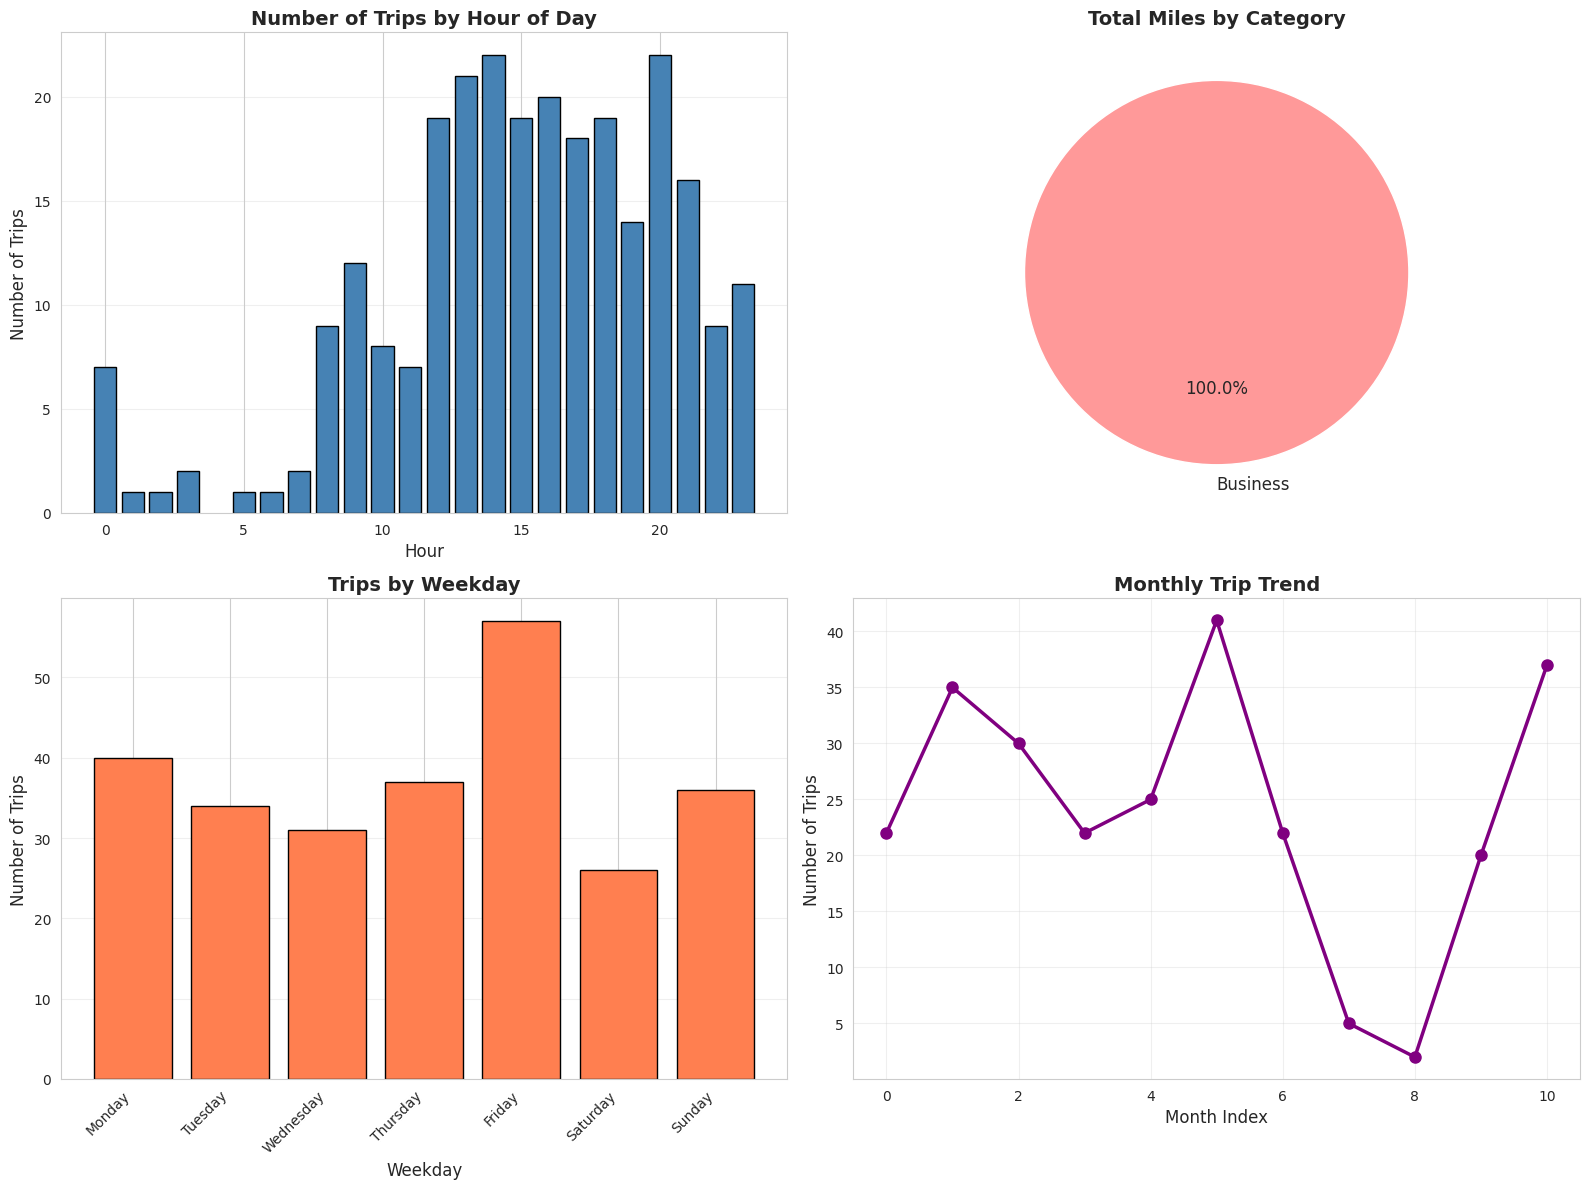

✓ Saved: uber_dashboard.png

📊 Generating heatmap...


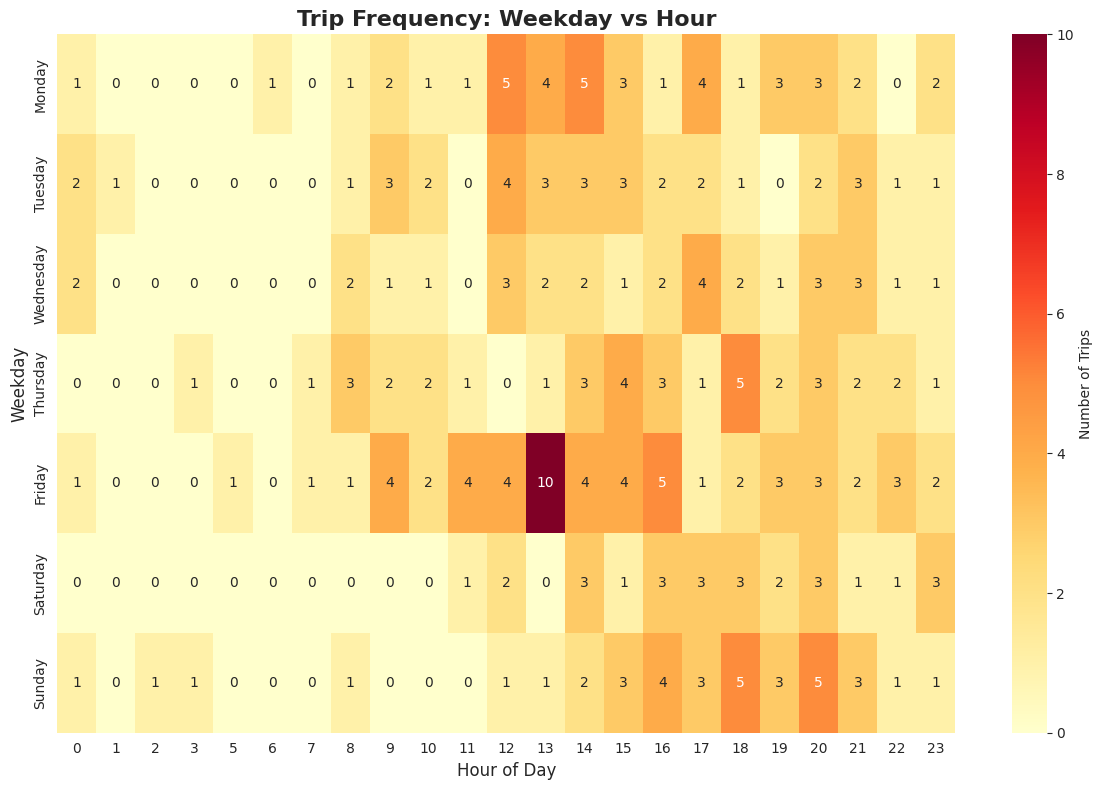

✓ Saved: heatmap_time.png

📊 Generating category-purpose analysis...


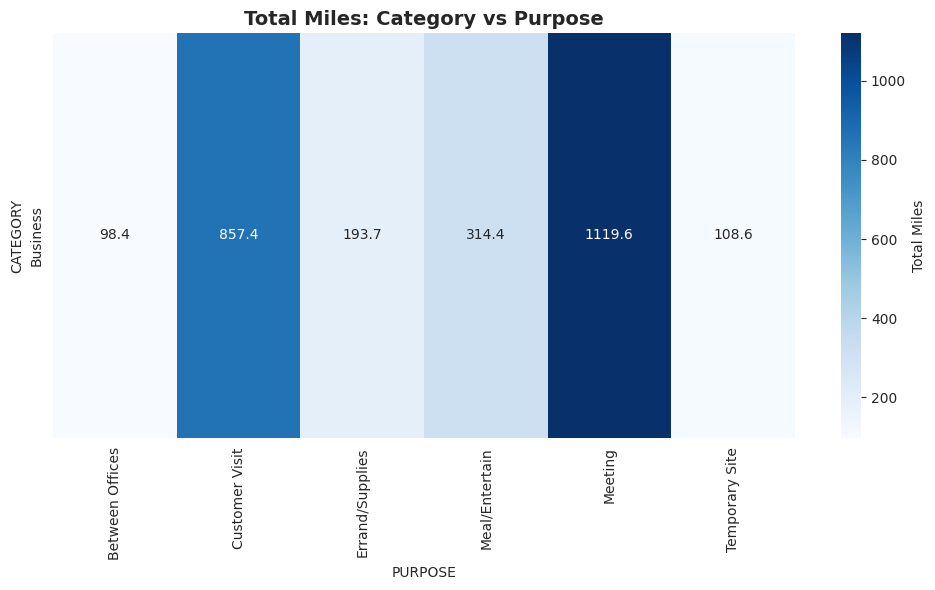

✓ Saved: category_purpose.png

📊 Generating distance distribution...


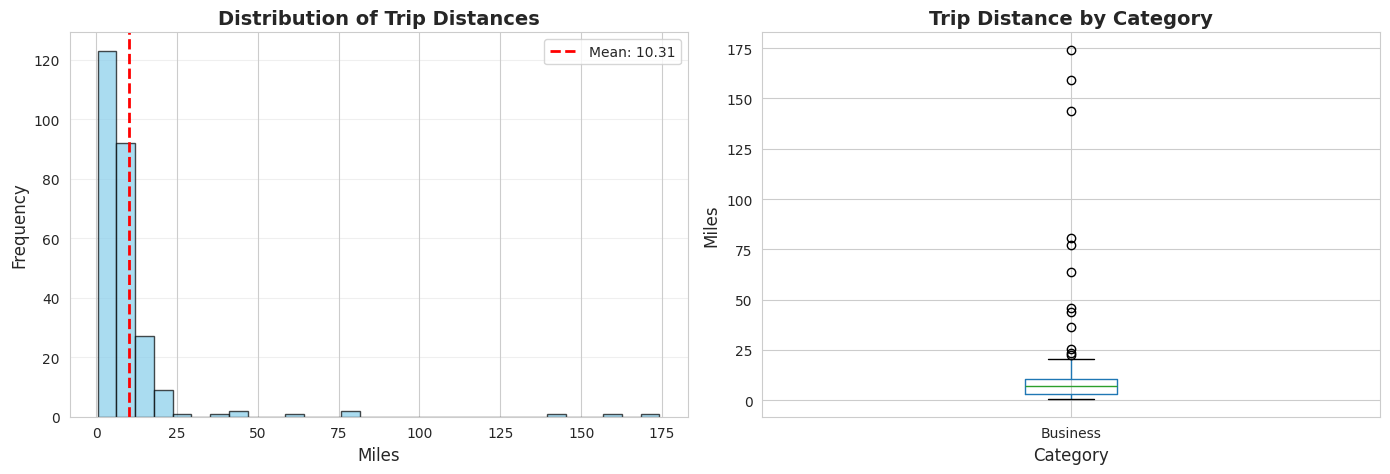

✓ Saved: distance_analysis.png

PREPARING DATA FOR POWER BI
✓ Exported: powerbi_main_data.csv
✓ Exported: powerbi_daily_summary.csv
✓ Exported: powerbi_hourly_summary.csv
✓ Exported: powerbi_route_summary.csv

EXECUTIVE SUMMARY REPORT

📊 UBER TRIP ANALYSIS - EXECUTIVE SUMMARY

📅 PERIOD: 2016-01-01 to 2016-12-12

🚗 TRIP STATISTICS
   • Total Trips: 261
   • Total Miles Driven: 2,692.10
   • Average Trip Distance: 10.31 miles
   • Longest Trip: 174.20 miles
   • Shortest Trip: 0.50 miles

💼 BUSINESS vs PERSONAL
   • Business Trips: 261 (100.0%)
   • Personal Trips: 0 (0.0%)
   • Business Miles: 2,692.10
   • Personal Miles: 0.00

💰 FINANCIAL
   • Total Business Reimbursement: $1,763.33
   • Average Monthly Reimbursement: $160.30

⏰ TIME PATTERNS
   • Busiest Hour: 14:00
   • Busiest Day: Friday
   • Average Trip Duration: 1317.8 minutes

🎯 TOP PURPOSES
PURPOSE
Meeting            81
Meal/Entertain     64
Errand/Supplies    47
Customer Visit     46
Temporary Site     14



✓ Executive summ

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Downloaded: uber_dashboard.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Downloaded: heatmap_time.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Downloaded: category_purpose.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Downloaded: distance_analysis.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Downloaded: powerbi_main_data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Downloaded: powerbi_daily_summary.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Downloaded: powerbi_hourly_summary.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Downloaded: powerbi_route_summary.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Downloaded: executive_summary.txt

✅ ANALYSIS COMPLETE!

📁 Files ready for Power BI:
   • powerbi_main_data.csv (main dataset)
   • powerbi_daily_summary.csv
   • powerbi_hourly_summary.csv
   • powerbi_route_summary.csv

📊 Visualizations:
   • uber_dashboard.png
   • heatmap_time.png
   • category_purpose.png
   • distance_analysis.png

📄 Report:
   • executive_summary.txt


In [15]:
#Visualizations
print("\n" + "="*70)
print("GENERATING VISUALIZATIONS")
print("="*70)

# Visualization 1: Overview Dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Trips by Hour
hour_counts = df['Hour'].value_counts().sort_index()
axes[0, 0].bar(hour_counts.index, hour_counts.values, color='steelblue', edgecolor='black')
axes[0, 0].set_title('Number of Trips by Hour of Day', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Hour', fontsize=12)
axes[0, 0].set_ylabel('Number of Trips', fontsize=12)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Category Distribution (Pie)
category_miles = df.groupby('CATEGORY')['MILES'].sum()
colors = ['#ff9999', '#66b3ff', '#99ff99']
axes[0, 1].pie(category_miles, labels=category_miles.index, autopct='%1.1f%%',
               colors=colors, startangle=90, textprops={'fontsize': 12})
axes[0, 1].set_title('Total Miles by Category', fontsize=14, fontweight='bold')

# 3. Weekday Trips
weekday_counts = df['Weekday'].value_counts().reindex(weekday_order)
axes[1, 0].bar(range(7), weekday_counts.values, color='coral', edgecolor='black')
axes[1, 0].set_xticks(range(7))
axes[1, 0].set_xticklabels(weekday_order, rotation=45, ha='right')
axes[1, 0].set_title('Trips by Weekday', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Weekday', fontsize=12)
axes[1, 0].set_ylabel('Number of Trips', fontsize=12)
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Monthly Trend
monthly_trips = df.groupby(['Year', 'Month']).size()
axes[1, 1].plot(range(len(monthly_trips)), monthly_trips.values,
                marker='o', linewidth=2.5, markersize=8, color='purple')
axes[1, 1].set_title('Monthly Trip Trend', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Month Index', fontsize=12)
axes[1, 1].set_ylabel('Number of Trips', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('uber_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: uber_dashboard.png")

# Visualization 2: Heatmap - Hour vs Weekday
print("\n📊 Generating heatmap...")
fig, ax = plt.subplots(figsize=(12, 8))
heatmap_data = pd.crosstab(df['Weekday'], df['Hour'])
heatmap_data = heatmap_data.reindex(weekday_order)
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd',
            cbar_kws={'label': 'Number of Trips'}, ax=ax)
ax.set_title('Trip Frequency: Weekday vs Hour', fontsize=16, fontweight='bold')
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_ylabel('Weekday', fontsize=12)
plt.tight_layout()
plt.savefig('heatmap_time.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: heatmap_time.png")

# Visualization 3: Category vs Purpose
print("\n📊 Generating category-purpose analysis...")
fig, ax = plt.subplots(figsize=(10, 6))
category_purpose_miles = pd.crosstab(df['CATEGORY'], df['PURPOSE'],
                                     values=df['MILES'], aggfunc='sum')
sns.heatmap(category_purpose_miles, annot=True, fmt='.1f', cmap='Blues',
            cbar_kws={'label': 'Total Miles'}, ax=ax)
ax.set_title('Total Miles: Category vs Purpose', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('category_purpose.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: category_purpose.png")

# Visualization 4: Distance Distribution
print("\n📊 Generating distance distribution...")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['MILES'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Trip Distances', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Miles', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].axvline(df['MILES'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["MILES"].mean():.2f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Box plot by category
df.boxplot(column='MILES', by='CATEGORY', ax=axes[1])
axes[1].set_title('Trip Distance by Category', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Category', fontsize=12)
axes[1].set_ylabel('Miles', fontsize=12)
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.savefig('distance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: distance_analysis.png")

# ============================================
# CELL 9: EXPORT DATA FOR POWER BI
# ============================================
print("\n" + "="*70)
print("PREPARING DATA FOR POWER BI")
print("="*70)

# Main export with all calculated fields
df_export = df.copy()
df_export['is_business'] = (df_export['CATEGORY'] == 'Business').astype(int)
df_export['reimbursement_amount'] = df_export['MILES'] * IRS_RATE * df_export['is_business']
df_export['date'] = df_export['START_DATE'].dt.date
df_export['year_month'] = df_export['START_DATE'].dt.to_period('M').astype(str)

# Save main file
df_export.to_csv('powerbi_main_data.csv', index=False)
print("✓ Exported: powerbi_main_data.csv")

# Summary tables
# 1. Daily summary
daily_summary = df_export.groupby('date').agg({
    'MILES': ['count', 'sum', 'mean'],
    'reimbursement_amount': 'sum'
}).round(2)
daily_summary.columns = ['trips', 'total_miles', 'avg_miles', 'reimbursement']
daily_summary.reset_index().to_csv('powerbi_daily_summary.csv', index=False)
print("✓ Exported: powerbi_daily_summary.csv")

# 2. Hourly summary
hourly_summary = df_export.groupby(['Hour', 'CATEGORY']).agg({
    'MILES': ['count', 'sum', 'mean']
}).round(2)
hourly_summary.columns = ['trips', 'total_miles', 'avg_miles']
hourly_summary.reset_index().to_csv('powerbi_hourly_summary.csv', index=False)
print("✓ Exported: powerbi_hourly_summary.csv")

# 3. Route summary
route_summary = df_export.groupby(['START', 'STOP', 'CATEGORY']).agg({
    'MILES': ['count', 'mean', 'sum']
}).round(2)
route_summary.columns = ['frequency', 'avg_distance', 'total_distance']
route_summary.reset_index().to_csv('powerbi_route_summary.csv', index=False)
print("✓ Exported: powerbi_route_summary.csv")

# ============================================
# CELL 10: SUMMARY REPORT
# ============================================
print("\n" + "="*70)
print("EXECUTIVE SUMMARY REPORT")
print("="*70)

summary_report = f"""
📊 UBER TRIP ANALYSIS - EXECUTIVE SUMMARY
{'='*70}

📅 PERIOD: {df['START_DATE'].min().strftime('%Y-%m-%d')} to {df['START_DATE'].max().strftime('%Y-%m-%d')}

🚗 TRIP STATISTICS
   • Total Trips: {len(df):,}
   • Total Miles Driven: {df['MILES'].sum():,.2f}
   • Average Trip Distance: {df['MILES'].mean():.2f} miles
   • Longest Trip: {df['MILES'].max():.2f} miles
   • Shortest Trip: {df['MILES'].min():.2f} miles

💼 BUSINESS vs PERSONAL
   • Business Trips: {len(df[df['CATEGORY']=='Business']):,} ({len(df[df['CATEGORY']=='Business'])/len(df)*100:.1f}%)
   • Personal Trips: {len(df[df['CATEGORY']=='Personal']):,} ({len(df[df['CATEGORY']=='Personal'])/len(df)*100:.1f}%)
   • Business Miles: {df[df['CATEGORY']=='Business']['MILES'].sum():,.2f}
   • Personal Miles: {df[df['CATEGORY']=='Personal']['MILES'].sum():,.2f}

💰 FINANCIAL
   • Total Business Reimbursement: ${business_miles * IRS_RATE:,.2f}
   • Average Monthly Reimbursement: ${(business_miles * IRS_RATE) / df['Month'].nunique():,.2f}

⏰ TIME PATTERNS
   • Busiest Hour: {df['Hour'].mode()[0]}:00
   • Busiest Day: {df['Weekday'].mode()[0]}
   • Average Trip Duration: {df['trip_duration_minutes'].mean():.1f} minutes

🎯 TOP PURPOSES
{df['PURPOSE'].value_counts().head().to_string()}

{'='*70}
"""

print(summary_report)

# Save report
with open('executive_summary.txt', 'w') as f:
    f.write(summary_report)
print("\n✓ Executive summary saved to: executive_summary.txt")

# ============================================
# CELL 11: DOWNLOAD ALL FILES
# ============================================
print("\n" + "="*70)
print("DOWNLOAD GENERATED FILES")
print("="*70)
print("\nClick below to download all generated files:")

from google.colab import files

# Download all generated files
files_to_download = [
    'uber_dashboard.png',
    'heatmap_time.png',
    'category_purpose.png',
    'distance_analysis.png',
    'powerbi_main_data.csv',
    'powerbi_daily_summary.csv',
    'powerbi_hourly_summary.csv',
    'powerbi_route_summary.csv',
    'executive_summary.txt'
]

for file in files_to_download:
    try:
        files.download(file)
        print(f"✓ Downloaded: {file}")
    except:
        print(f"⚠️ Could not download: {file}")

print("\n" + "="*70)
print("✅ ANALYSIS COMPLETE!")
print("="*70)
print("\n📁 Files ready for Power BI:")
print("   • powerbi_main_data.csv (main dataset)")
print("   • powerbi_daily_summary.csv")
print("   • powerbi_hourly_summary.csv")
print("   • powerbi_route_summary.csv")
print("\n📊 Visualizations:")
print("   • uber_dashboard.png")
print("   • heatmap_time.png")
print("   • category_purpose.png")
print("   • distance_analysis.png")
print("\n📄 Report:")
print("   • executive_summary.txt")